# Early access to the dataset
**Full Project instructions are not here**

Here you can find data description and SQL tasks of the project.

To start working in your own Datacamp Workspace you need to:
- Go to File
- Choose Duplicate Workspace
- Give it your own unique name and start exploring.

# Project#3 - Diabetes Indicators
## The story Behind The Data
Diabetes is one of the most prevalent chronic diseases in the US, impacting millions of Americans each year and exerting a significant financial burden on the economy. 
Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. 
After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. 
This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. 
Diabetes is generally characterised by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

The goal in this project is to explore some of the following research questions:

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?

**A full ERD can be found [here](https://dbdiagram.io/d/638ceb8abae3ed7c4544a0da)**

# Data Description
In this task, few datasets are provided:

1. **`demographic_data.csv` - contains demographic data per each person**
    - `uniqueID` - responder ID. Represents one person
    - `Sex`- 0 = female 1 = male
    - `Age` - Age in category (see mapping below) -
        
        *1 - (18 <= AGE <= 24)*
        
        *2 - (25 <= AGE <= 29)*
        
        *3 - (30 <= AGE <= 34)*
        
        *4 - (35 <= AGE <= 39)*
        
        *5 - (40 <= AGE <= 44)*
        
        *6 - (45 <= AGE <= 49)*
        
        *7 - (50 <= AGE <= 54)*
        
        *8 - (55 <= AGE <= 59)*
        
        *9 - (60 <= AGE <= 64)*
        
        *10 - (65 <= AGE <= 69)*
        
        *11 - (70 <= AGE <= 74)*
        
        *12 - (75 <= AGE <= 79)*
        
        *13 - (80 <= AGE <= 99)*
        
        *14 - Don’t know / Refused to answer / Missing*
        
    - `Education` - Education category (see mapping below) -
        1 - Didn’t graduate high school
        2 - Graduated high school
        3 - Attended college or technical school
        4 - Graduated college or technical school
        9 - Don’t know / Refused to answer / Missing*
    - `Income` - Income category (see mapping below) -
        
        1 - income less than $15,000
        2 - $15,000 <= income < $25,000
        3 - $25,000 <= income < $35,000
        4 - $35,000 to less than $50,000
        5 - income >= $50,000
        9 - Don’t know / Not sure / Missing Respondents
        
2. **`id_label.csv` (Note: This file contains the label for this dataset)**
    - `uniqueID` - responder ID. Represents one person
    - `Diabetes_binary` - 0 is for no diabetes, and 1 is for prediabetes or diabetes
3. **`health_measures.csv` - contains relevant health measures per each person**
    - `uniqueID` - responder ID. Represents one person
    - `NoDocbcCost`- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
    - `AnyHealthCare` - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
    - `CholCheck` - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
    - `DiffWalk` - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
    - `HvyAlcoholConsump` - (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
    - `Stroke` - (Ever told) you had a stroke. 0 = no 1 = yes
    - `Veggies` - Consume Vegetables 1 or more times per day 0 = no 1 = yes
    - `HighBP` - (Blood Pressure) 0 = no high BP 1 = high BP
    - `HeartDiseaseorAttack` - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
    - `PhysActivity` - physical activity in past 30 days - not including job; 0 = no 1 = yes
    - `MentHlth` - days of poor mental health scale 1-30 days
    - `HighChol` - 0 = no high cholesterol 1 = high cholesterol
    - `BMI` - Body Mass Index
    - `GenHlth` - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
    - `Fruits` - Consume Fruit 1 or more times per day 0 = no 1 = yes
4. **`enriched_data.csv` -** extra data gathered per each person and contains few more measures
    - `uniqueID` - responder ID. Represents one person
    - `PhysHlth` - physical illness or injury count of days in past 30 days, scale 1-30
    - `Smoker` - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

# SQL tasks

1. What is the average physical illness in the data?
2. Among smoker vs. non-smoker, please calculate the following metrics:
    1. the amount of diabetes vs. non diabetes can be found in the data?
    2. the avg, min and max physical illness can be found in the data?
3. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?
4. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?
5. Some hospitals had approached you and are asking for some information. Please help them get the following -
    1. Please generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC
    2. Let’s create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
    Note: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column.
    Once we have this column, let’s understand per each income level, who are the top 7 persons with the highest ratio

# 1. What is the average physical illness in the data?


In [1]:
SELECT avg(PhysHlth) as illness_average
FROM enriched_data
WHERE PhysHlth > 0


illness_average
0        11.493688

# 2. Among smoker vs. non-smoker, please calculate the following metrics:
   # 1. the amount of diabetes vs. non diabetes can be found in the data?

In [2]:
SELECT i.Diabetes_binary, count(*), 
 
CASE 
    WHEN diabetes_binary = 0 AND  smoker = 1 THEN 'smoker and non diabetic'
    WHEN diabetes_binary = 1 AND  smoker = 1 THEN 'smoker diabetic'
    WHEN diabetes_binary = 0 AND  smoker = 0 THEN ' non smoker and non diabetic'
    WHEN diabetes_binary = 1 AND  smoker = 0 THEN 'non smoker diabetic'
    
END AS diabetes_for_smoker
FROM enriched_data e
JOIN id_label i
ON e.uniqueID = i.uniqueID
GROUP BY 1, e.smoker



diabetes_binary   count           diabetes_for_smoker
0                1   18317               smoker diabetic
1                0   94106       smoker and non diabetic
2                1   17029           non smoker diabetic
3                0  124228   non smoker and non diabetic

#     2. the avg, min and max physical illness can be found in the data?


In [3]:
SELECT 'Non-Smokers' as Group,
avg(PhysHlth) as average_ill,
min(PhysHlth) as min_ill,
max(PhysHlth) as max_ill
FROM enriched_data
WHERE smoker = 0
UNION
SELECT 'Smokers' as Group,
avg(PhysHlth) as average_ill,
min(PhysHlth) as min_ill,
max(PhysHlth) as max_ill
FROM enriched_data
WHERE smoker = 1;

group  average_ill  min_ill  max_ill
0  Non-Smokers     3.336323        0       30
1      Smokers     5.380145        0       30

# 3. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?


In [4]:
SELECT count(e.smoker) smoker_with_diff_to_walk
FROM enriched_data e
JOIN health_measures h
ON e.uniqueID = h.uniqueID
WHERE e.smoker = 1 AND h.DiffWalk = 1


smoker_with_diff_to_walk
0                     24685

# 4. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?

In [5]:
SELECT d.Education, count(d.Education) ,
count(d.education) * 100.0 / 
                            (select count(d.education) as total_rows
                            from demographic_data d
                            JOIN id_label i
                            ON d.uniqueID = i.uniqueID
                            join enriched_data e
                            ON e.uniqueID = i.uniqueID
                            WHERE e.smoker = 1 AND i.Diabetes_binary = 1 AND d.sex = 1)  as percentage
FROM enriched_data e
JOIN id_label i
ON e.uniqueID = i.uniqueID
JOIN demographic_data d
ON i.uniqueID = d.uniqueID 
WHERE e.smoker = 1 AND i.Diabetes_binary = 1 AND d.sex = 1
GROUP BY 1


education  count  percentage
0          1     10    0.100030
1          2    347    3.471041
2          3    716    7.162149
3          4   3185   31.859558
4          5   2908   29.088727
5          6   2831   28.318496

# 5. Some hospitals had approached you and are asking for some information. Please help them get the following -
   # 1. Please generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC

In [6]:

with rs as
(SELECT d.education, h.bmi, h.uniqueid,
rank() over(partition by d.education  order by h.bmi desc ) as rank
FROM demographic_data d
JOIN health_measures h
ON d.uniqueid = h.uniqueid)

SELECT education, bmi, uniqueid
FROM 
  ( SELECT education, bmi,uniqueid,
           ROW_NUMBER() OVER (PARTITION BY education
                              ORDER BY bmi DESC
                             )
             AS rn
    FROM rs
  ) tmp 
WHERE rn <= 5
ORDER BY education, rn


education  bmi  uniqueid
0           1   57    100832
1           1   56    173846
2           1   52      9511
3           1   51     88546
4           1   50     76212
5           2   84     79543
6           2   81     76378
7           2   81     76442
8           2   79     76505
9           2   75    142744
10          3   95     79492
11          3   95     79522
12          3   92     79349
13          3   90    165695
14          3   89     76481
15          4   98     79478
16          4   98     76370
17          4   96     36324
18          4   95     76371
19          4   95     76353
20          5   98     76532
21          5   98     76396
22          5   95     76527
23          5   95     76366
24          5   92     79497
25          6   98     79554
26          6   98     79507
27          6   98     76394
28          6   95     79418
29          6   95     79544

# 2. Let’s create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.# Note: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column. Once we have this column, let’s understand per each income level, who are the top 7 persons with the highest ratio

In [7]:
with ratio as 
(SELECT h.bmi, h.MentHlth, d.income, d.uniqueid,
case
    when h.MentHlth=0 then 0
    else h.bmi/h.MentHlth
    end as BMIToMentalActivityRatio
FROM health_measures h
JOIN demographic_data d
ON h.uniqueid = d.uniqueid)

SELECT income,BMIToMentalActivityRatio , uniqueid
FROM 
  ( SELECT income, BMIToMentalActivityRatio,uniqueid,
           ROW_NUMBER() OVER (PARTITION BY income
                              ORDER BY BMIToMentalActivityRatio DESC
                             )
             AS rn
    FROM ratio
  ) tmp 
WHERE rn <= 7
ORDER BY income, rn 


income  bmitomentalactivityratio  uniqueid
0        1                        44    213505
1        1                        44    111105
2        1                        42     50020
3        1                        42    213242
4        1                        42      8417
5        1                        42    179154
6        1                        42    177673
7        2                        56     58641
8        2                        54    212589
9        2                        47      2983
10       2                        47     44181
11       2                        47    203723
12       2                        47    158164
13       2                        46    144526
14       3                        79     79327
15       3                        65    225821
16       3                        64     29645
17       3                        60    199147
18       3                        59    174190
19       3                        58    149752
20       3                        52    212402
21       4                        73     79453
22       4                        62    190048
23       4                        54    162478
24       4                        51     61656
25       4                        50    165993
26       4                        49    206649
27       4                        49    235150
28       5                        79     76369
29       5                        66     64639
30       5                        53     74957
31       5                        53     27036
32       5                        51    229233
33       5                        50    224336
34       5                        50     31389
35       6                        92     79386
36       6                        89     79558
37       6                        82     76458
38       6                        82     76484
39       6                        75     79330
40       6                        58    107201
41       6                        57     60793
42       7                        89     79340
43       7                        60     59748
44       7                        59    140950
45       7                        58    115278
46       7                        56    235434
47       7                        55     23397
48       7                        55    177788
49       8                        87     79516
50       8                        82    224210
51       8                        79     59789
52       8                        75     76323
53       8                        75     79517
54       8                        73     76517
55       8                        71     76464

Following your SQL tasks, you can add here Python code cells and start to process and explore data based on csv files in this workspace.

# Python deep analysis part
## importing the libraries 

In [8]:
# importing the libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

## Uploading and Merging all the tables to one table

In [9]:
# merging all 4 tables to 1 table and converting it to a csv file
df = pd.read_csv('demographic_data.csv')
df2 = pd.read_csv('id_label.csv')
df3 = pd.read_csv('health_measures.csv')
df4 = pd.read_csv('enriched_data.csv')
diabetic = df.merge(df2, on = 'uniqueID').merge(df3, on = 'uniqueID').merge(df4, on = 'uniqueID')
diabetic.shape
diabetic.head()
diabetic = diabetic.to_csv('diabetic.csv')

In [10]:
# loading the merged file as a dataframe
data = pd.read_csv('diabetic.csv')

# will explore the data in order to clean it and getting it ready for analyses 

In [11]:
data.head()

Unnamed: 0  uniqueID  Sex  Age  ...  NoDocbcCost  AnyHealthcare  PhysHlth  Smoker
0           0         0    0    9  ...            0              1        15       1
1           1         1    0    7  ...            1              0         0       1
2           2         2    0    9  ...            1              1        30       0
3           3         3    0   11  ...            0              1         0       0
4           4         4    0   11  ...            0              1         0       0

[5 rows x 24 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            253680 non-null  int64  
 1   uniqueID              253680 non-null  int64  
 2   Sex                   253680 non-null  int64  
 3   Age                   253680 non-null  int64  
 4   Education             253680 non-null  int64  
 5   Income                253680 non-null  int64  
 6   Diabetes_binary       253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   BMI                   253680 non-null  int64  
 9   DiffWalk              253680 non-null  int64  
 10  GenHlth               253680 non-null  int64  
 11  HighBP                253680 non-null  int64  
 12  HighChol              253680 non-null  int64  
 13  CholCheck             253680 non-null  int64  
 14  MentHlth              253680 non-null  int64  
 15  

In [13]:
data.describe()

Unnamed: 0       uniqueID  ...       PhysHlth         Smoker
count  253680.000000  253680.000000  ...  253680.000000  253680.000000
mean   126839.500000  126839.500000  ...       4.242081       0.443169
std     73231.252481   73231.252481  ...       8.717951       0.496761
min         0.000000       0.000000  ...       0.000000       0.000000
25%     63419.750000   63419.750000  ...       0.000000       0.000000
50%    126839.500000  126839.500000  ...       0.000000       0.000000
75%    190259.250000  190259.250000  ...       3.000000       1.000000
max    253679.000000  253679.000000  ...      30.000000       1.000000

[8 rows x 24 columns]

# things to clean
1) change datatype diabetes_binary to int
2) lower case all the headers
3) drop Unnamed column since it's a duplicated for uniqueid column
4) education and income columns has multiple values that indicate the same thing so drop the extra values
5) changing values to more self explanatory like gender from 0,1 to male and female and yes and no


# creating a copy of the dataframe prior to the cleaning

In [14]:
df = data.copy()

In [15]:
df.head()

Unnamed: 0  uniqueID  Sex  Age  ...  NoDocbcCost  AnyHealthcare  PhysHlth  Smoker
0           0         0    0    9  ...            0              1        15       1
1           1         1    0    7  ...            1              0         0       1
2           2         2    0    9  ...            1              1        30       0
3           3         3    0   11  ...            0              1         0       0
4           4         4    0   11  ...            0              1         0       0

[5 rows x 24 columns]

# changing all the headers to lowercase for easier analysis 

In [16]:
df.columns = [x.lower() for x in df.columns]


In [17]:
# test
df.head()

unnamed: 0  uniqueid  sex  age  ...  nodocbccost  anyhealthcare  physhlth  smoker
0           0         0    0    9  ...            0              1        15       1
1           1         1    0    7  ...            1              0         0       1
2           2         2    0    9  ...            1              1        30       0
3           3         3    0   11  ...            0              1         0       0
4           4         4    0   11  ...            0              1         0       0

[5 rows x 24 columns]

# converting diabetes_binary column to int

In [18]:
df['diabetes_binary'] = df['diabetes_binary'].astype('int64')

In [19]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   unnamed: 0            253680 non-null  int64
 1   uniqueid              253680 non-null  int64
 2   sex                   253680 non-null  int64
 3   age                   253680 non-null  int64
 4   education             253680 non-null  int64
 5   income                253680 non-null  int64
 6   diabetes_binary       253680 non-null  int64
 7   heartdiseaseorattack  253680 non-null  int64
 8   bmi                   253680 non-null  int64
 9   diffwalk              253680 non-null  int64
 10  genhlth               253680 non-null  int64
 11  highbp                253680 non-null  int64
 12  highchol              253680 non-null  int64
 13  cholcheck             253680 non-null  int64
 14  menthlth              253680 non-null  int64
 15  veggies               253680 non-n

# will drop the duplicated column 'unnamed:0'

In [20]:
df = df.drop('unnamed: 0', axis=1)


In [21]:
# test
df.head()

uniqueid  sex  age  education  ...  nodocbccost  anyhealthcare  physhlth  smoker
0         0    0    9          4  ...            0              1        15       1
1         1    0    7          6  ...            1              0         0       1
2         2    0    9          4  ...            1              1        30       0
3         3    0   11          3  ...            0              1         0       0
4         4    0   11          5  ...            0              1         0       0

[5 rows x 23 columns]

# will replace the duplicated values (in some columns there are multiple values representing the same thing e.g in education column the values 1,2,3 representing "didn't graduate high school")

In [22]:
# replacing the values in the income column

df['income'] = df['income'].replace(2, 1).replace(3, 2).replace(4,2).replace(5,3).replace(6,4).replace(7,5).replace(8,5)
df['income'].value_counts()

5    133604
4     36470
2     36129
3     25883
1     21594
Name: income, dtype: int64

In [23]:
# replacing the values 2 and 3 with the value 1 in column education

df['education'] = df['education'].replace(2,1).replace(3,1).replace(4,2).replace(5,3).replace(6,4)
df['education'].value_counts()

4    107325
3     69910
2     62750
1     13695
Name: education, dtype: int64

# will replace the values to a more self explanatory for easier analysis 

In [24]:
# replacing all 0,1 column to yes and no
df[['diabetes_binary', 'heartdiseaseorattack', 'diffwalk', 'highbp', 'highchol', 'cholcheck', 'veggies',
    'stroke', 'fruits', 'physactivity', 'hvyalcoholconsump', 'nodocbccost',
    'anyhealthcare', 'smoker' ]] = df[['diabetes_binary', 'heartdiseaseorattack', 'diffwalk', 'highbp', 'highchol', 'cholcheck', 'veggies',
    'stroke', 'fruits', 'physactivity', 'hvyalcoholconsump', 'nodocbccost',
    'anyhealthcare', 'smoker' ]].astype(str).replace('0','no').replace('1','yes')
# replacing sex column to male and female
df['sex'] = df['sex'].astype(str).replace('0', 'female').replace('1','male')
df.head()

uniqueid     sex  age  education  ...  nodocbccost anyhealthcare physhlth  smoker
0         0  female    9          2  ...           no           yes       15     yes
1         1  female    7          4  ...          yes            no        0     yes
2         2  female    9          2  ...          yes           yes       30      no
3         3  female   11          1  ...           no           yes        0      no
4         4  female   11          3  ...           no           yes        0      no

[5 rows x 23 columns]

# EDA starting to explore the data for analysis 

# creating functions for the main plots that i will use

In [25]:
#creating a fuction that plots seaborn countplots
def countplot(df, x, hue=None, color=None, palette=None, order=None,title=None,xlabel=None,ylabel=None,ax=None):
    
    #plot
    sns.countplot(data=df, x=x, hue=hue, color=color, palette=palette, order=order)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    ax = ax;

In [26]:
#creating a fuction that plots seaborn histplots
def histplot(df, x, hue=None, color=None, palette=None, bins=10,title=None,xlabel=None,ylabel=None):
    
    #plot
    sns.histplot(data=df, x=x, hue=hue, color=color, palette=palette)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count');

In [27]:
#creating a fuction that plots seaborn barplots
def barplot(df, x,y, hue=None, color=None, palette=None, bins=10,title=None,xlabel=None,ylabel=None):
    
    
    #plot
    sns.barplot(data=df, x=x,y=y, hue=hue, color=color, palette=palette)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [28]:
#creating a fuction that plots seaborn boxplots
def boxplot(df, x, y=None, title=None, xlabel=None, ylabel=None):
    
     
    #plot
    sns.boxplot(data=df, x=x,y=y)
    # setting up the title and x,y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [29]:
# looking at the basic statistics 
df.describe()

uniqueid            age  ...       menthlth       physhlth
count  253680.000000  253680.000000  ...  253680.000000  253680.000000
mean   126839.500000       8.032119  ...       3.184772       4.242081
std     73231.252481       3.054220  ...       7.412847       8.717951
min         0.000000       1.000000  ...       0.000000       0.000000
25%     63419.750000       6.000000  ...       0.000000       0.000000
50%    126839.500000       8.000000  ...       0.000000       0.000000
75%    190259.250000      10.000000  ...       2.000000       3.000000
max    253679.000000      13.000000  ...      30.000000      30.000000

[8 rows x 8 columns]

# What is the most important metric that affects diabetes in the dataset?

## Looking at the distribution of different columns and looking for outliers 

## What is the distribution of the genders and age groups in the dataset?

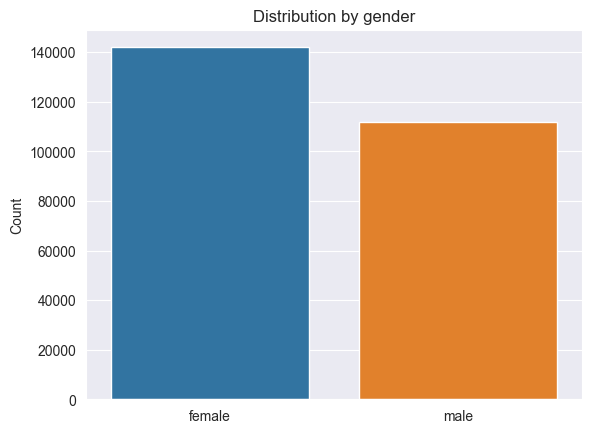

In [30]:

countplot(df,x='sex', title='Distribution by gender')

## There are more than 30% more females in the dataframe than males

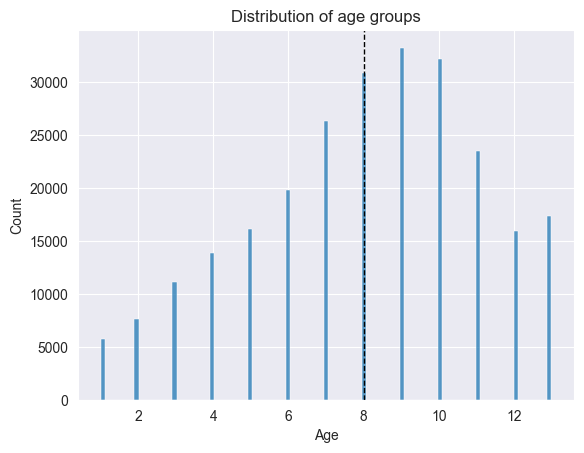

In [31]:
# distribution of age column

histplot(df,x='age', title='Distribution of age groups', xlabel='Age')
plt.axvline(df.age.median(), color='k', linestyle='dashed', linewidth=1)


## let's see the age groups and diabetes

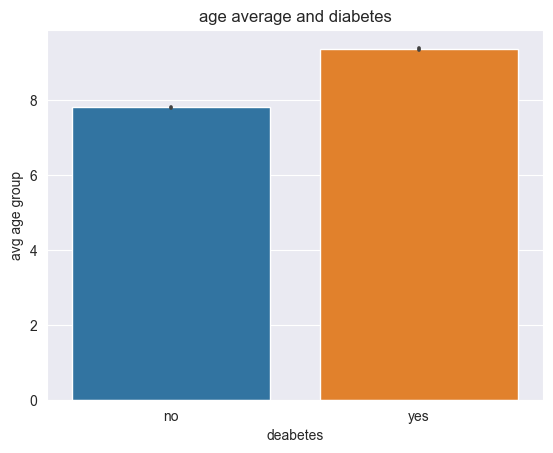

In [32]:
barplot(df, x='diabetes_binary', y='age', title='age average and diabetes', xlabel='deabetes',ylabel='avg age group')

## on average people with diabetes are 10-15 percent older than people without diabetes 

## Most of the people in the dataframe are older than 50 years old where the median is between 55-59 years old

## let's see if there are any outliers in the age column

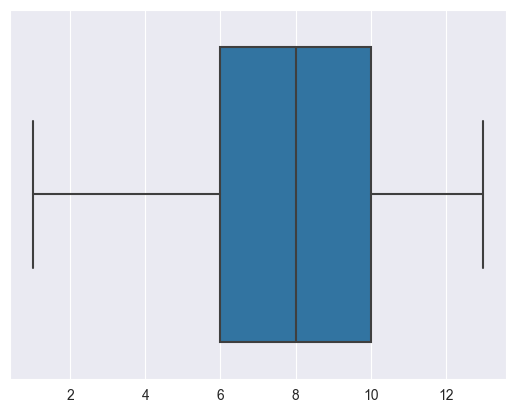

In [33]:
# checking for outliers in the age column
boxplot(df,x='age')

## the age column is by age groups and there are no outliers

## what is the distribution of the education and income columns?

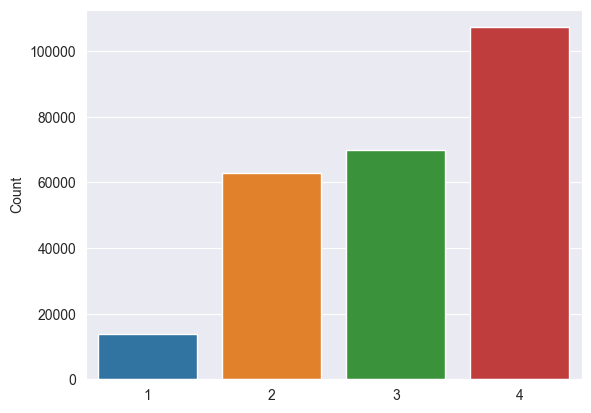

In [34]:
# distribution of education column

countplot(df,x='education')

## most of the people graduated college

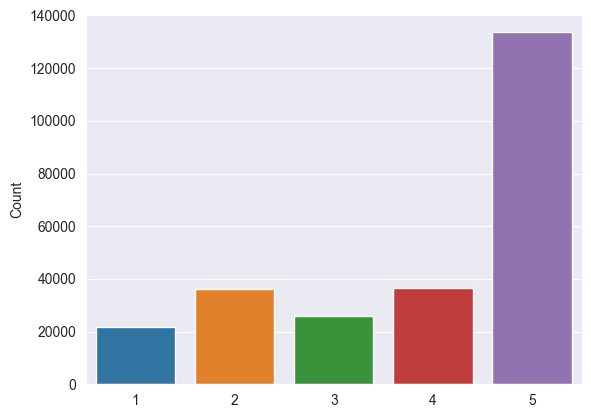

In [35]:
# distribution of income column
countplot(df,x='income')

## most people income is over $50000

## What percent of the people have diabetes?

''

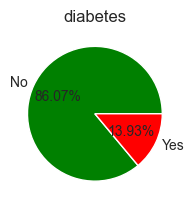

In [36]:
# checking the percentage of diabetic people in the dataset
dia = df['diabetes_binary'].value_counts()
labels = ['No', 'Yes']

#fig = plt.figure(figsize=(8,8))
fig  = plt.subplots(figsize = (10,10))
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(dia,labels = labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetes')

;

## Almost 14% of the people in the dataset have diabetes which is 40% more of the adults leaving in the US which is 10%

## How does general health distributes between diabetic and non diabetic?

In [37]:
a = df['genhlth']
b = df[df['diabetes_binary']=='yes']['genhlth']
c = df[df['diabetes_binary']=='no']['genhlth']



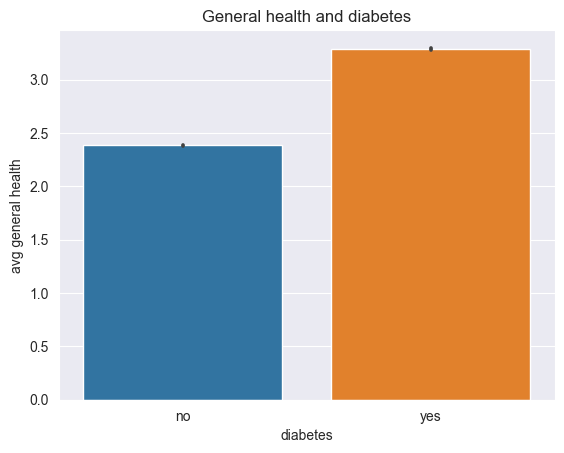

In [38]:
# comparing the average general health and diabetes
barplot(df, x = 'diabetes_binary', y = 'genhlth', title='General health and diabetes', xlabel='diabetes',ylabel='avg general health')



## in average people with diabetes reporting 30% less general health  

## how does people who skip seeing a doctor because of cost distributes between diabetic and non diabetic?

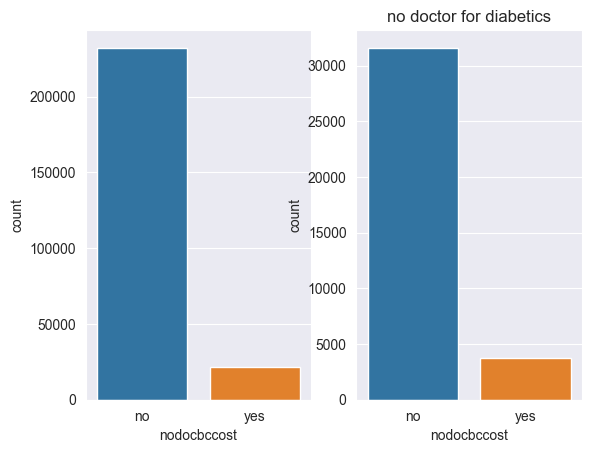

In [39]:
a = df[df['diabetes_binary']=='yes']

fig, ax =plt.subplots(1,2)
plt.yticks = [20000, 40000, 60000, 80000, 100000]

sns.countplot(data=df,x='nodocbccost', ax=ax[0])
plt.title('no doctor')
sns.countplot(data = a, x='nodocbccost', ax=ax[1])

plt.title('no doctor for diabetics');


In [40]:
diabetic_no_doctor = df[df['diabetes_binary']=='yes']['nodocbccost'].value_counts()
no_doctor = df['nodocbccost'].value_counts()


''

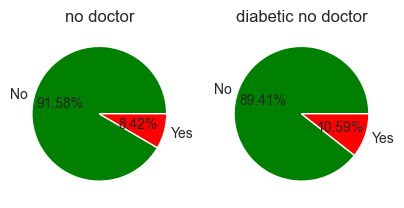

In [41]:
labels = ['No', 'Yes']

fig  = plt.subplots(figsize = (10,10))
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(no_doctor,labels = labels,colors=("g","r"), autopct='%.2f%%')
plt.title('no doctor')

ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(diabetic_no_doctor,labels= labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetic no doctor')

;   

## people with diabetic have more times that can't see a doctor because they can't afford it

## want to see the distribution of mental health and physical health 

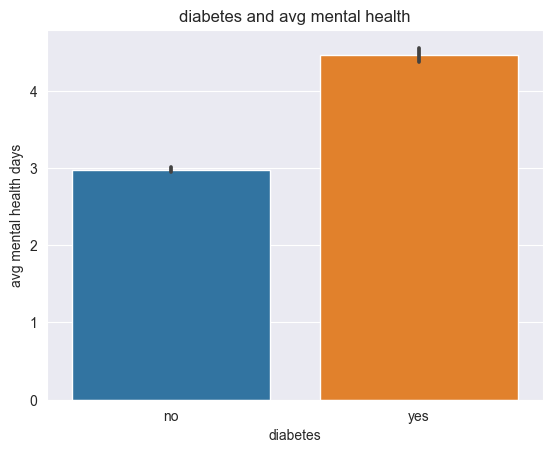

In [42]:
barplot(df,x='diabetes_binary', y='menthlth', title='diabetes and avg mental health', xlabel='diabetes',ylabel='avg mental health days')

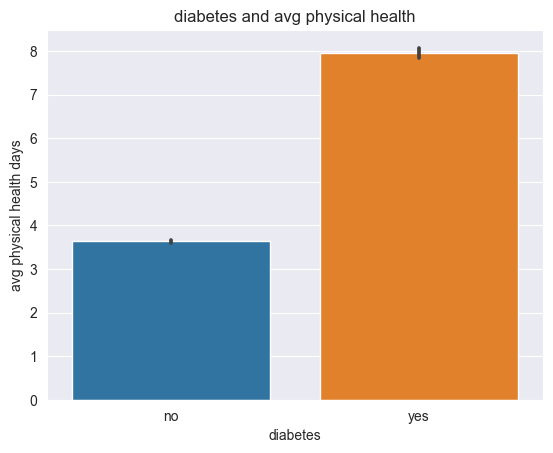

In [43]:
barplot(df,x='diabetes_binary', y='physhlth', title='diabetes and avg physical health', xlabel='diabetes',ylabel='avg physical health days')

## in both physical and mental sick days the people with diabetes has a higher average. in physical days the difference is higher with 8 days compare to 3.5 for non diabetic people and in the mental days the diabetic people has average of 4.5 day and non diabetic 3 days

## It is generally  known that over weight has a direct affect on type 2 diabetes so will look on the bmi column to look for different aspects of it.
## What is the relationship between BMI and diabetes?

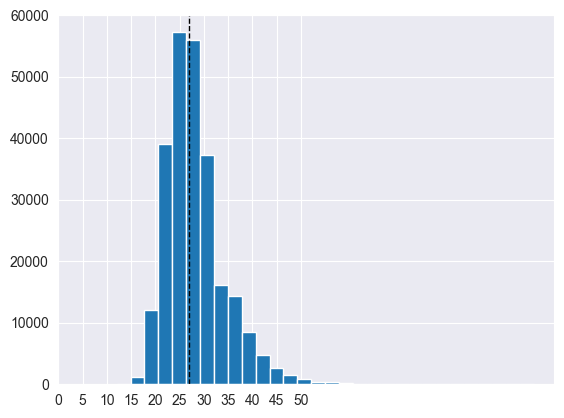

In [44]:
#histplot(df,x='bmi', bins=5)
plt.hist(df.bmi, bins = 30)
plt.axvline(df.bmi.median(), color='k', linestyle='dashed', linewidth=1)

plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);

## Half of the people in the Dataframe are over weight 

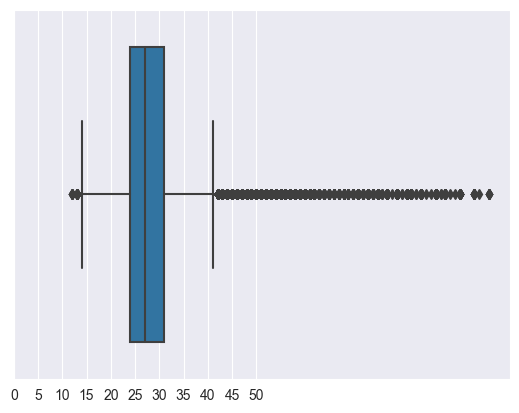

In [45]:
boxplot(df, x='bmi')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);

## 25% of the people are consider obese, we can also see that there are many values here that are outlier showing again the fact that many people are extremely over weight.
although a large amount of outlier will push the mean higher I decided not to remove them because that metric is a key point of the appearance of diabetes and might even be a cause I think that it's beneficial to keep it. 

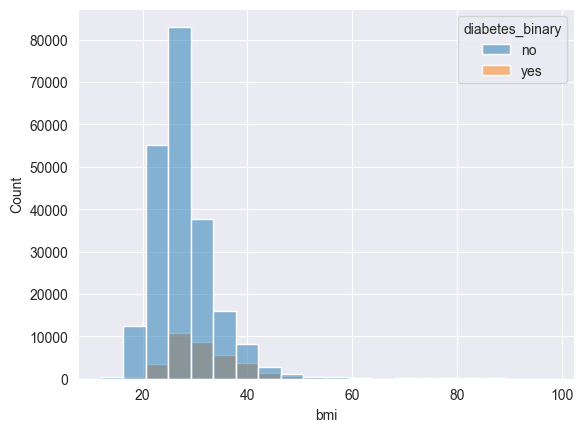

In [46]:
sns.histplot(x = 'bmi', data= df, bins = 20,  hue = 'diabetes_binary');


## The histogram shows that when bmi is over 25 the amount of people that have diabetes start to increase 


## want to see how vegetables  and fruits are influencing the amount of people that has diabetes 

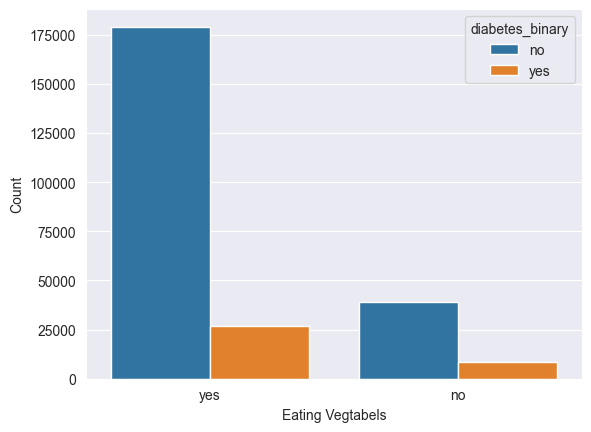

In [47]:

countplot(df, x='veggies',hue='diabetes_binary', xlabel='Eating Vegtabels')


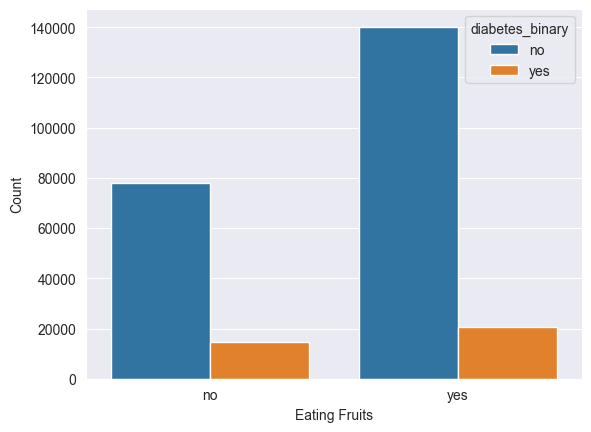

In [48]:
countplot(df, x='fruits',hue='diabetes_binary', xlabel='Eating Fruits')

## can't find any absolute answer to fruits and vegetables influencing diabetes

## here i have created a new metric for over weight and obese according to the CDC and filtered the data to see if i can find a relationship to diabetes

In [49]:
# overwieght and obese according to the CDC
over = df[df['bmi'] >= 25]
obese = df[df['bmi'] >= 30]
obese['diabetes_binary'].value_counts()

no     67294
yes    20557
Name: diabetes_binary, dtype: int64

In [50]:
# plotting it in a pie chart and compering it to the whole dataframe
over_diabetes = df[df['bmi'] >= 25]['diabetes_binary'].value_counts()
obese_diabetes = df[df['bmi'] >= 30]['diabetes_binary'].value_counts()
normal_bmi = df.loc[(df['bmi'] >= 18.5)& (df['bmi'] <=24.9)]['diabetes_binary'].value_counts()



In [51]:
over_diabetes = df[df['bmi'] >= 25]['diabetes_binary'].value_counts()


''

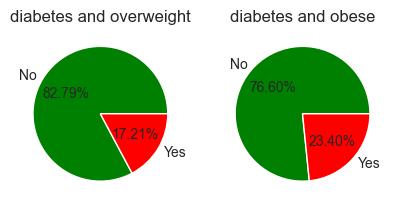

In [52]:
labels = ['No', 'Yes']

#fig = plt.figure(figsize=(8,8))
fig  = plt.subplots(figsize = (10,10))
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(over_diabetes,labels = labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetes and overweight')

ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(obese_diabetes,labels= labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetes and obese')

;   

Text(0.5, 1.0, 'diabetes when bmi is normal')

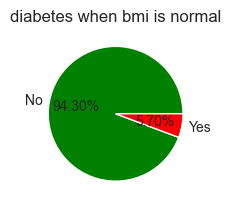

In [53]:
labels = ['No', 'Yes']
fig  = plt.subplots(figsize = (10,10))



ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(normal_bmi,labels= labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetes when bmi is normal')

## 6% of people who have a normal bmi  also have diabetes 17% of people who are overweight have diabetes and more than 23% of obese have diabetes so there is a clear relationship between bmi and diabetes

In [54]:
# i want to see how overweight affects sick days
over_sick = df[df['bmi'] >= 25]
avg_overweight = over_sick['physhlth'].mean()
obese_sick = df[df['bmi'] >= 30]
avg_obese = obese_sick['physhlth'].mean()
normal_bmi_sick = df.loc[(df['bmi'] >= 18.5)& (df['bmi'] <=24.9)]
avg_normal = normal_bmi_sick['physhlth'].mean()

avg_sick = [avg_normal, avg_obese, avg_overweight]
avg_sick

[3.38475483300219, 5.477615508076174, 4.5284306167400885]

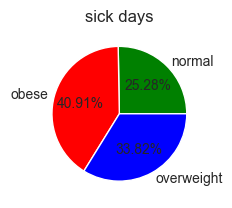

In [55]:
fig  = plt.subplots(figsize = (10,10))

labels = ['normal', 'obese', 'overweight']
ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(avg_sick,labels= labels,colors=("g","r","b"), autopct='%.2f%%')
plt.title('sick days');

## the higher the bmi the more sick days the people have on average

## Now i want to look on all the health conditions and see if there are anything pointing out as a relationship with diabetes
## What is the relationships between each medical condition and diabetes?

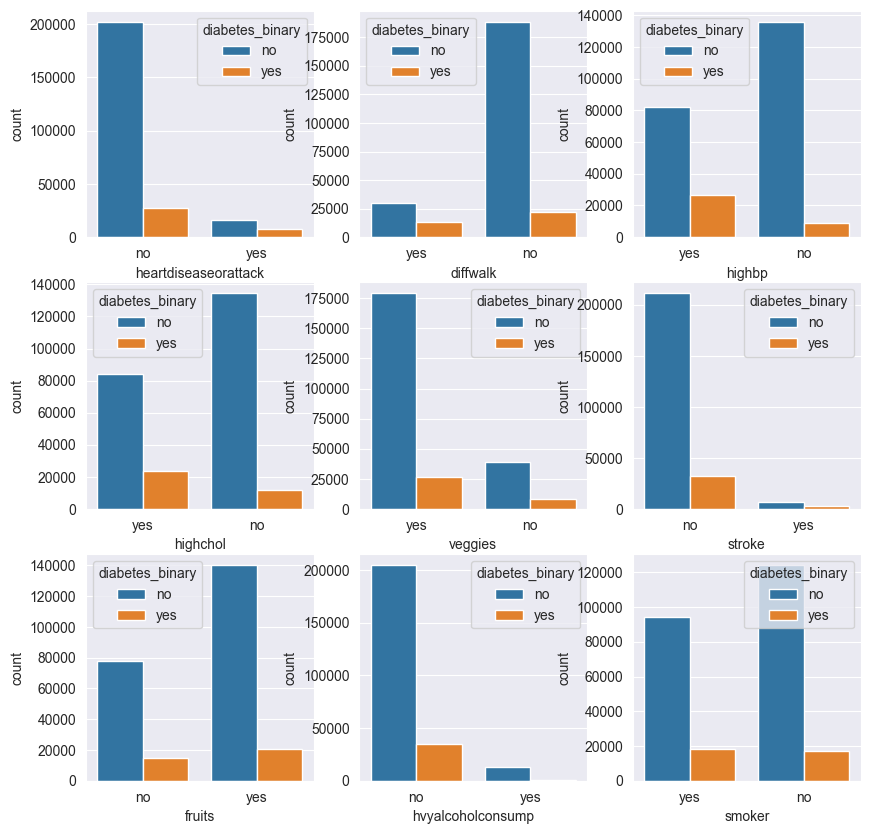

In [56]:
cat_features = df[[ 'heartdiseaseorattack', 'diffwalk', 'highbp', 'highchol', 'veggies', 'stroke', 'fruits', 'hvyalcoholconsump', 'smoker' ]]
fig , ax = plt.subplots( 3,3,figsize = (10,10))# set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_features, ax.flatten()):  
  sns.countplot(x=cat_features[i],hue = df['diabetes_binary'],ax = subplots)

## we can see that in many conditions are higher with the people that have diabetes yet i want to see it more clearly with percentages so will try to look at it with a pie chart 

## will filter the data to all the people who has each one of the conditions and will see how many of them are having diabetes in percentage

In [57]:
# for loop to plot all the pie charts
columns = [ 'heartdiseaseorattack', 'diffwalk', 'highbp', 'highchol', 'stroke', 'hvyalcoholconsump', 'smoker' ]
labels = ['No', 'Yes']
for idx, col in enumerate(columns):
    x = df[df[col]== 'yes']['diabetes_binary'].value_counts()
    y = df[df[col]== 'no']['diabetes_binary'].value_counts()
    fig = plt.figure(figsize=(18,10), dpi=1600) 

    ax1 = plt.subplot2grid((2,4),(0,0))
    plt.pie(x,labels = labels,colors=("g","r"), autopct='%.2f%%')
    plt.title('diabetes and' + ' ' + col)
    

    ax1 = plt.subplot2grid((2, 4), (0, 1))
    plt.pie(y,labels= labels,colors=("g","r"), autopct='%.2f%%')
    plt.title('diabetes and no' + ' ' + col )
    
  
    

## We see across all conditions that having these conditions will increase the chance to see diabetes with it by 300 to 400 percents yet since we don't have the times that each condition nor the diabetes appearance we can' determine if one lead to another ( we have one column that shows that so called heavy consumption of alcohol reduces the diabetes with it in 300 percent yet i would suspect the validation of it and would think it might be a mistake somewhere along the way.)

## How does age and diabetic affect the amount of days that people feel sick?

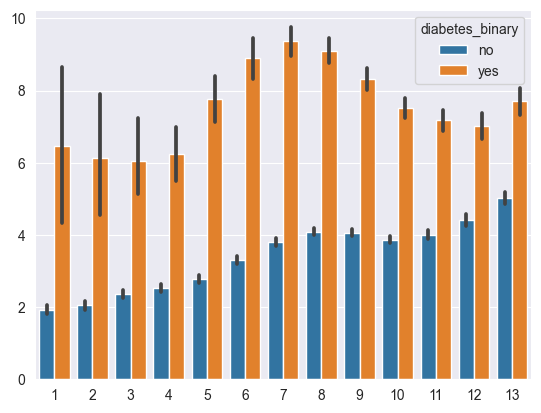

In [58]:
barplot(df, x = 'age',y='physhlth', hue='diabetes_binary')

## people with diabetes are definitely have more sick days across all age groups

## Is physical activity affects the amount of diabetic people?

In [59]:
excersise = df[df['physactivity']== 'yes']['diabetes_binary'].value_counts()
no_excersise = df[df['physactivity']== 'no']['diabetes_binary'].value_counts()
labels = ['No', 'Yes']

fig = plt.figure(figsize=(18,10), dpi=1600) 

ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(excersise,labels = labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetes and excersise')
    

ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(no_excersise,labels= labels,colors=("g","r"), autopct='%.2f%%')
plt.title('diabetes and no excersize');

## there are almost two time more people with diabetes if they are not doing some kind of physical activity 

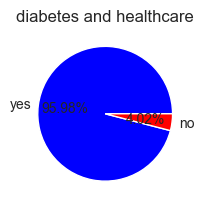

In [60]:
insurance = df[df['diabetes_binary']=='yes']['anyhealthcare'].value_counts()
labels = ['yes', 'no']
fig  = plt.subplots(figsize = (10,10))

ax1 = plt.subplot2grid((2, 4),(0, 1))
plt.pie(insurance,labels= labels,colors=("b","r"), autopct='%.2f%%')
plt.title('diabetes and healthcare' );


## 4% of people with diabetes doesn't have any healthcare insurance

## On top of looking at diabetes wanted to take a look at how the health conditions appear for smokers 

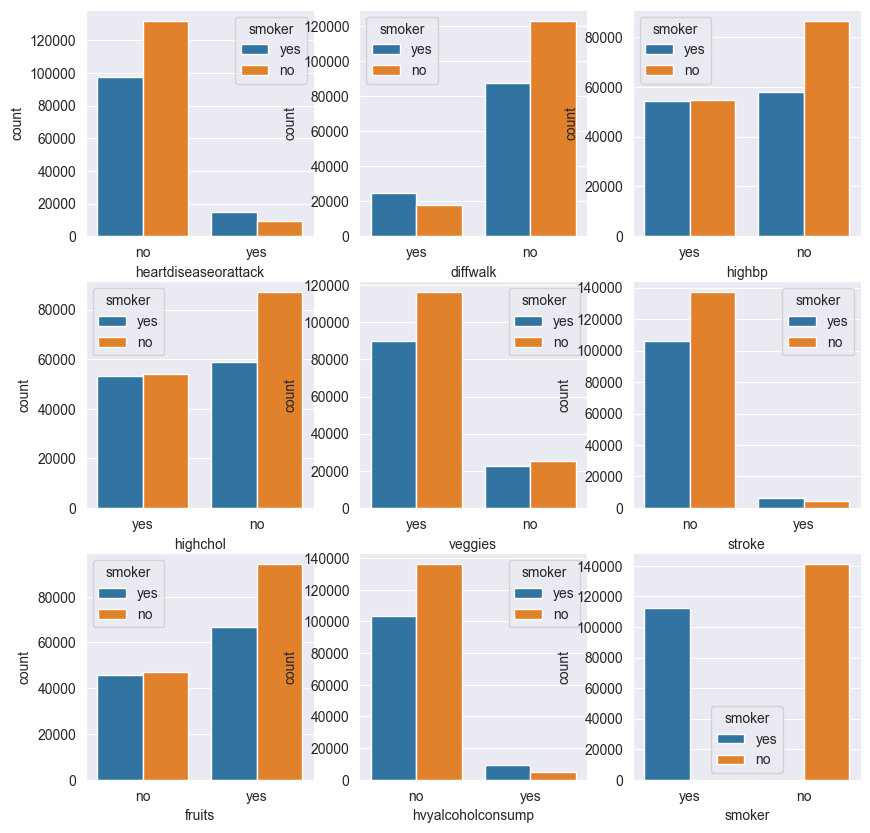

In [61]:
cat_features = df[[ 'heartdiseaseorattack', 'diffwalk', 'highbp', 'highchol', 'veggies', 'stroke', 'fruits', 'hvyalcoholconsump', 'smoker' ]]
fig , ax = plt.subplots( 3,3,figsize = (10,10))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_features, ax.flatten()):  
  sns.countplot(x=cat_features[i],hue = df['smoker'],ax = subplots)


In [62]:
capstone_data = df.to_csv('capstone_data.csv')

# Work Summary
## About the data
The dataset contain 23 columns and 253680 rows each row will show many different information points of a specific patient although there are many different health conditions in the dataset the focus of my work is about diabetes.
the source of the data is unknown
## wrangling and cleaning 
I started by examining the data so i can clean it for better analysis and found the following list and cleaned it  
1) change datatype diabetes_binary to int
2) lower case all the headers
3) drop Unnamed column since it's a duplicated for uniqueid column
4) education and income columns has multiple values that indicate the same thing so drop the extra values
5) changing values to more self explanatory like gender from 0,1 to male and female and yes and no

## Summary distribution and outliers
* almost 14% of the people in the dataset have diabetes which is 40% higher than general adult population in the US which is 10% perhaps to do with the older average age.
* There are 30% more females than males in the dataset
* Most of the people in the dataset are between 55-59 years old
* half of the people in the dataset are consider overweight (25<bmi<30)
* 25% of the people in the dataset are consider obese
* The only column that has outliers is the BMI column yet i decided to keep the value since it's a very relevant metric for the relationship with diabetes

## Summary of columns relationships findings
* On average people with diabetes are 10-15% older than people without diabetes
* People with diabetes are reporting of 35% worse general health
* people with diabetic are having much more physical and mental sick days around 40% more mental days and more than double physical days than non diabetics
* the number of people that have diabetes start to dramatically increase when bmi is 25 which is the threshold of what consider overweight.
* The higher the bmi the higher percentage of the sick days that patients have: 40% of total sick days are taken by people that consider obese
* across all health conditions in the dataset having these conditions will increase the chance to see diabetes with it by 300 to 400 percents yet since we don't have the times that each condition nor the diabetes appearance we can't determine if one lead to another ( we have one column that shows that so called heavy consumption of alcohol reduces the diabetes with it in 300 percent yet i would suspect the validation of it and would think it might be a mistake somewhere along the way.)
* people that are doing some physical activity have 50% less chance to have diabetes. the dataset shows that people that doesn't workout have almost two times more diabetes

## Conclusions
* the most important metric that has a direct relationship with diabetes is the bmi the higher the bmi the higher diabetes percentage. only 6% of people with a normal bmi have diabetes which is less than half of the total of the dataset and more than 23% of the people that consider obese (according of the official definition of the CDC)
* physical activity will reduce the chance to have diabetes by 50%
* Diabetes will show up more as one's getting older

## Enriched data
I would like to have more data for two main things one is data about the diabetes treatment and the dates which diabetes was found and each one of the other conditions were found for that i would need to get 12 more columns:
1) Kind of treatment they get: insulin /oral treatment /dietary treatment.
2) The dose of the treatment
3) Last HbA1c results (HbA1c is the measure of glucose in the red blood cells which gives an indication of the average of the sugar blood level in the last 3 months prior to the test)
4) Date of last HbA1c.
5-12) Dates for each medical conditions

To add the new columns i would make a copy of the original dataset and will join the new columns to the copied data with a inner left join that will make sure I'm filtering the data only for people with diabetes and keeping the relevant data from the original data and adding all the new data that is provided.

Having that new data will allow me to answer the following questions:
1) How well the diabetes is maintained which will affect of the ability of the patients to reduce the chance for complications
2) How does the diabetes maintenance affects the other variables in the dataset?
3) the relationships between the diabetes and other conditions and being able to see if one is the result of another or not
4) The affect of the diabetes maintenance overtime to be able to asses the chances for complications


# Recommendations

In order to reduce the chance for having diabetes we need to make sure that more people grow up and knowing the importance of heaving a health life style.
I would recommend to:
* Start a campaign for the ages 18 -30 with the importance of eating healthy in order to keep the bmi in the normal range
* Start a campaign to encourage people of all ages to add physical activity to their schedule which will reduce the chance of getting sick.
* Lobbying the government or congress to to give financial incentives for schools from young age to prove that they are providing educational programs that encourage children to keep healthy eating habits and physical activity
* Although the focus of the research was on diabetes i could find relationships between smoking and health conditions and if the company would want i could deepen in it and come up with specific recommendations







# Tableau Part

## First Dashboard BMI KPI
https://public.tableau.com/app/profile/idan.wisman/viz/CapstoneProject2_16751830346940/KPIBmiAspects?publish=yes

## Second Dashboard Health Conditions KPI
https://public.tableau.com/app/profile/idan.wisman/viz/CapstoneProject2_16751830346940/KPIHealthConditionsAndDiabetic?publish=yes


## Third Dashboard Health Measures And Diabetes
https://public.tableau.com/app/profile/idan.wisman/viz/CapstoneProject2_16751830346940/HealthMeasuresAndDiabetes?publish=yes

## Fourth Dashboard Heatmap Income Education And Diabetes
https://public.tableau.com/app/profile/idan.wisman/viz/CapstoneProject2_16751830346940/HeatMapEducationIncomeAndDiabetes?publish=yes

## Fifth Dashboard  Age Gender And Diabetes
https://public.tableau.com/app/profile/idan.wisman/viz/CapstoneProject2_16751830346940/AgeGenderAndDiabetes?publish=yes